In [7]:
# ================================
# TUGAS BESAR: Fuzzy System - Alcohol Effects On Study
# ================================

In [9]:
!pip install scikit-fuzzy
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from pathlib import Path
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [10]:
#Isi Dataset awal
csv_path = Path('Alcohol_Effects_Study.csv')
assert csv_path.exists(), "Alcohol_Effects_Study.csv not found!"

data = pd.read_csv(csv_path)

#salin Data agar tidak mengubah data asli
data_clean = data.copy()

print("Dataset awal", data.shape)
data.head()

Dataset awal (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
# Data atribut
# School (sekolah), biner: 'GP' - Gabriel Pereira atau 'MS' - Mousinho da Silveira
# Sex (Jenis Kelamin), biner: 'F' - perempuan atau 'M' - laki-laki
# Age (Umur), usia siswa (angka: dari 15 sampai 22)
# Address (Alamat), jenis alamat rumah siswa biner: 'U' - perkotaan atau 'R' - pedesaan
# Famsize (Ukuran keluarga) , biner: 'LE3' - kurang atau sama dengan 3 atau 'GT3' - lebih besar dari 3
# Pstatus (Tinggal bersama Orang Tua) , biner: 'T' - tinggal bersama atau 'A' - terpisah
# Medu (Pendidikan Ibu), angka: 0 - tidak ada, 1 - pendidikan dasar (kelas 4), 2 - kelas 5 hingga 9, 3 - pendidikan menengah atau 4 - pendidikan tinggi
# Fedu (Pendidikan Ayah), angka: 0 - tidak ada, 1 - pendidikan dasar (kelas 4), 2 - kelas 5 hingga 9, 3 - pendidikan menengah atau 4 - pendidikan tinggi
# Mjob (Pekerjaan ibu), nominal: 'guru', terkait perawatan 'kesehatan', 'pelayanan' sipil (misalnya administrasi atau kepolisian), 'di rumah' atau 'lainnya'
# Famrel (Pekerjaan ayah), nominal: 'guru', terkait perawatan 'kesehatan', 'pelayanan' sipil (misalnya administrasi atau kepolisian), 'di rumah' atau 'lainnya'
# Freetime (Waktu luang ), angka: dari 1 - sangat rendah hingga 5 - sangat tinggi
# Dalc (Konsumsi alkohol harian), numeric: dari 1 - Sangat Rendah s/d 5 - Sangat Tinggi
# Walc (Konsumsi alkohol akhir pekan) , numeric: dari 1 - Sangat Rendah s/d 5 - Sangat Tinggi
# studytime (Waktu belajar mingguan), angka: 1 - <2 jam, 2 - 2 sampai 5 jam, 3 - 5 sampai 10 jam, atau 4 - >10 jam
# famsup (Dukungan keluarga), (biner: ya atau tidak)
# absences(Absensi), angka: dari 0 hingga 93
# health(kesehatan), numeric: dari 1 - Sangat Rendah s/d 5 - Sangat Tinggi
# goout(frekuensi bersosialisasi) numeric: dari 1 - Tidak Pernah s/d 5 - Selalu

print("Statistik Awal:")
print(data.describe())

Statistik Awal:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.

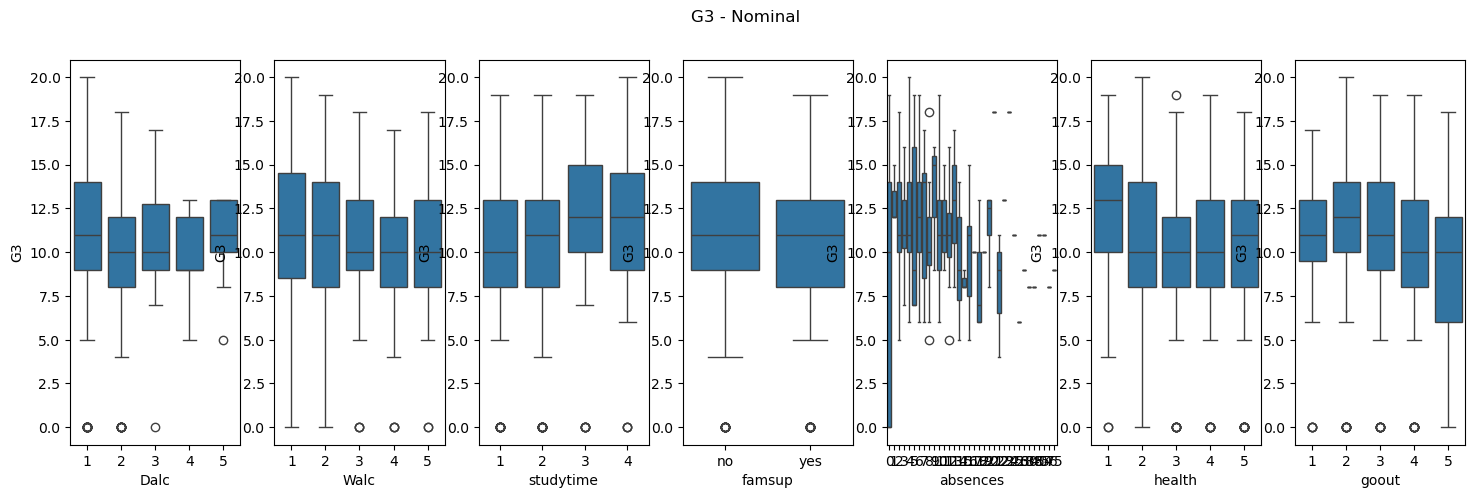

In [12]:
# Fitur yang relevan
# Dalc (Konsumsi alkohol harian), numeric: dari 1 - Sangat Rendah s/d 5 - Sangat Tinggi
# Walc (Konsumsi alkohol akhir pekan) , numeric: dari 1 - Sangat Rendah s/d 5 - Sangat Tinggi
# studytime (Waktu belajar mingguan),  angka: 1 - <2 jam, 2 - 2 sampai 5 jam, 3 - 5 sampai 10 jam, atau 4 - >10 jam
# famsup (Dukungan keluarga), biner: ya (yes) atau tidak (no)
# absences(Absensi), angka: dari 0 hingga 93
# health(kesehatan), numeric: dari 1 - Sangat Rendah s/d 5 - Sangat Tinggi
# goout(frekuensi bersosialisasi) numeric: dari 1 - Tidak Pernah s/d 5 - Selalu

features = ['Dalc', 'Walc', 'studytime', 'famsup', 'absences', 'health', 'goout']
#features = ['Dalc', 'Walc', 'studytime',   'health', 'goout']
target = 'G3'
data_selected = data_clean[features]
##visualisasi  per g3 dari masing-masing feature

fig = plt.figure(figsize = (18,5))
g = gs.GridSpec(nrows = 1, ncols = 7, figure = fig)
plt.suptitle("G3 - Nominal")
j = 0
for feat in features:
    ax = plt.subplot(g[0,j])
    ax = sns.boxplot(data = data, x = data[feat], y = data["G3"])
    j = j+1



In [13]:
#Cek missing value
missing_values = data_clean.isnull().sum()

In [14]:
#Tampilkan jumlah missing value 
missing_summary = pd.DataFrame({
    'Missing Values': missing_values
}).sort_values(by='Missing Values', ascending=False)

missing_summary.head(10)

,Missing Values
school,0
paid,0
G2,0
G1,0
absences,0
health,0
Walc,0
Dalc,0
goout,0
freetime,0


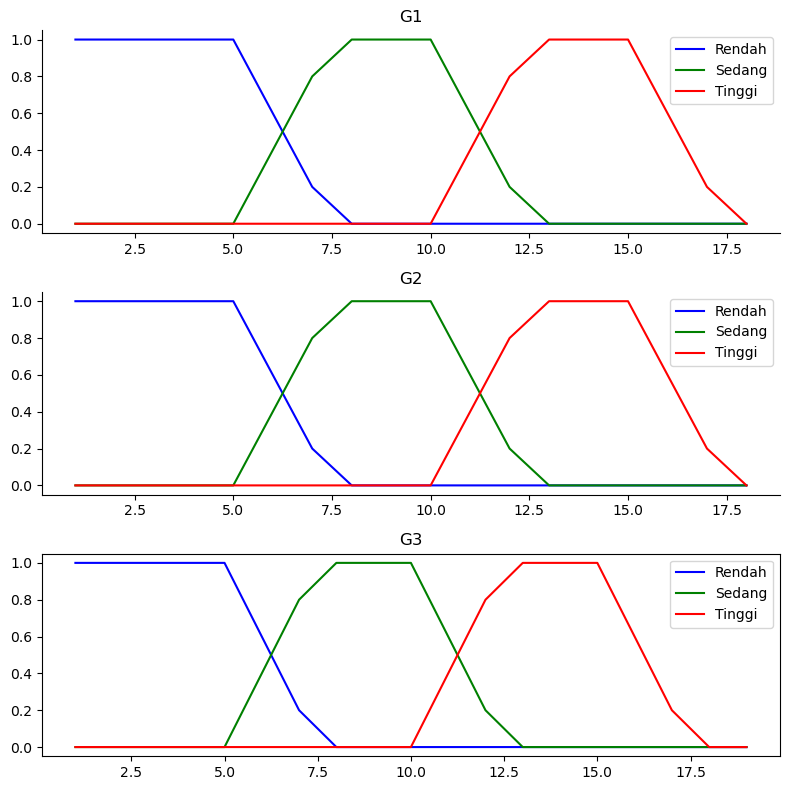

In [18]:
#fungsi keanggotaan fuzzy untuk G1 dan G2
# Generate universe variables
x_g1 = np.arange(1, 19, 1)
x_g2 = np.arange(1, 19, 1)
x_g3 = np.arange(1, 20, 1)

# Generate fuzzy membership functions
x_g1_r = fuzz.trapmf(x_g1, [0, 0, 5, 7.5])
x_g1_s  = fuzz.trapmf(x_g1, [5, 7.5, 10, 12.5])
x_g1_t  = fuzz.trapmf(x_g1, [10, 12.5, 15, 17.5])


x_g2_r = fuzz.trapmf(x_g2, [0, 0, 5, 7.5])
x_g2_s  = fuzz.trapmf(x_g2, [5, 7.5, 10, 12.5])
x_g2_t  = fuzz.trapmf(x_g2, [10, 12.5, 15, 17.5])

x_g3_r = fuzz.trapmf(x_g3, [0, 0, 5, 7.5])
x_g3_s  = fuzz.trapmf(x_g3, [5, 7.5, 10, 12.5])
x_g3_t  = fuzz.trapmf(x_g3, [10, 12.5, 15, 17.5])

SS  =0.8
S   =0.6
AS  =0.4
TS  =0.2

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 8))

ax0.plot(x_g1, x_g1_r, 'b', linewidth=1.5, label='Rendah')
ax0.plot(x_g1, x_g1_s, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_g1, x_g1_t, 'r', linewidth=1.5, label='Tinggi')


ax0.set_title('G1')
ax0.legend()

ax1.plot(x_g2, x_g2_r, 'b', linewidth=1.5, label='Rendah')
ax1.plot(x_g2, x_g2_s, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_g2, x_g2_t, 'r', linewidth=1.5, label='Tinggi')


ax1.set_title('G2')
ax1.legend()




ax2.plot(x_g3, x_g3_r, 'b', linewidth=1.5, label='Rendah')
ax2.plot(x_g3, x_g3_s, 'g', linewidth=1.5, label='Sedang')
ax2.plot(x_g3, x_g3_t, 'r', linewidth=1.5, label='Tinggi')





ax2.set_title('G3')
ax2.legend()
# Turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [19]:
# Konversi 'famsup' menjadi numerik
data['famsup'] = data['famsup'].map({'yes': 1, 'no': 0})

In [20]:
# Hapus nilai G1 dan G2 untuk menjaga validitas prediksi
data = data.drop(['G1', 'G2'], axis=1)

In [21]:
# Kategorikan G3 menjadi Rendah, Sedang, Tinggi
def categorize_g3(score):
    if score <= 10:
        return 'Rendah'
    elif score <= 15:
        return 'Sedang'
    else:
        return 'Tinggi'

data['G3_cat'] = data['G3'].apply(categorize_g3)

In [22]:
# Bagi data menjadi fitur dan target
X = data[features]
y = data['G3_cat']


In [23]:
# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Definisikan fungsi keanggotaan untuk setiap fitur
def fuzzify_studytime(value):
    if value <= 1:
        return {'Pendek': 1, 'Sedang': 0, 'Lama': 0}
    elif value == 2:
        return {'Pendek': 0.5, 'Sedang': 0.5, 'Lama': 0}
    elif value == 3:
        return {'Pendek': 0, 'Sedang': 0.5, 'Lama': 0.5}
    else:
        return {'Pendek': 0, 'Sedang': 0, 'Lama': 1}

def fuzzify_dalc(value):
    if value <= 1:
        return {'Rendah': 1, 'Sedang': 0, 'Tinggi': 0}
    elif value == 2:
        return {'Rendah': 0.5, 'Sedang': 0.5, 'Tinggi': 0}
    elif value == 3:
        return {'Rendah': 0, 'Sedang': 1, 'Tinggi': 0}
    elif value == 4:
        return {'Rendah': 0, 'Sedang': 0.5, 'Tinggi': 0.5}
    else:
        return {'Rendah': 0, 'Sedang': 0, 'Tinggi': 1}

In [25]:
# Definisikan aturan fuzzy Mamdani
def mamdani_inference(row):
    studytime = fuzzify_studytime(row['studytime'])
    dalc = fuzzify_dalc(row['Dalc'])

    # Aturan: IF Dalc = Tinggi AND Studytime = Pendek THEN Performa = Rendah
    rule1 = min(dalc['Tinggi'], studytime['Pendek'])

    # Aturan: IF Dalc = Sedang AND Studytime = Sedang THEN Performa = Sedang
    rule2 = min(dalc['Sedang'], studytime['Sedang'])

    # Aturan: IF Dalc = Rendah AND Studytime = Lama THEN Performa = Tinggi
    rule3 = min(dalc['Rendah'], studytime['Lama'])

    # Agregasi hasil
    output = {'Rendah': rule1, 'Sedang': rule2, 'Tinggi': rule3}
    return max(output, key=output.get)

# Terapkan inferensi Mamdani pada data uji
y_pred_mamdani = X_test.apply(mamdani_inference, axis=1)

In [26]:
# Definisikan fungsi inferensi Sugeno
def sugeno_inference(row):
    # Aturan: IF Dalc = Tinggi AND Studytime = Pendek THEN Performa = 5
    if row['Dalc'] >= 4 and row['studytime'] <= 1:
        return 5
    # Aturan: IF Dalc = Rendah AND Studytime = Lama THEN Performa = 18
    elif row['Dalc'] <= 1 and row['studytime'] >= 3:
        return 18
    # Aturan: IF Dalc = Sedang AND Studytime = Sedang THEN Performa = 12
    else:
        return 12

# Terapkan inferensi Sugeno pada data uji
y_pred_sugeno_numeric = X_test.apply(sugeno_inference, axis=1)

# Kategorikan hasil prediksi Sugeno
def categorize_sugeno(score):
    if score <= 10:
        return 'Rendah'
    elif score <= 15:
        return 'Sedang'
    else:
        return 'Tinggi'

y_pred_sugeno = y_pred_sugeno_numeric.apply(categorize_sugeno)

In [30]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [31]:
#Evaluasi Model
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluasi Model: {model_name}")
    print(f"Akurasi: {accuracy_score(y_true, y_pred)*100:.2f}%")
    print(f"Presisi: {precision_score(y_true, y_pred, average='macro')*100:.2f}%")
    print(f"Recall  : {recall_score(y_true, y_pred, average='macro')*100:.2f}%")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='macro')*100:.2f}%")
    
    # Mean absolute percentage error (MAPE) adalah metrik yang mendefinisikan keakuratan metode prediksi
    print("MAPE:", mape(y_true.map({'Rendah': 1, 'Sedang': 2, 'Tinggi': 2}), y_pred.map({'Rendah': 1, 'Sedang': 2, 'Tinggi': 2})))
    print("\n")

evaluate_model(y_test, y_pred_mamdani, "Fuzzy Mamdani")
evaluate_model(y_test, y_pred_sugeno, "Fuzzy Sugeno")


Evaluasi Model: Fuzzy Mamdani
Akurasi: 40.51%
Presisi: 32.67%
Recall  : 31.12%
F1-Score: 27.41%
MAPE: 32.278481012658226


Evaluasi Model: Fuzzy Sugeno
Akurasi: 35.44%
Presisi: 49.23%
Recall  : 32.17%
F1-Score: 22.66%
MAPE: 46.835443037974684




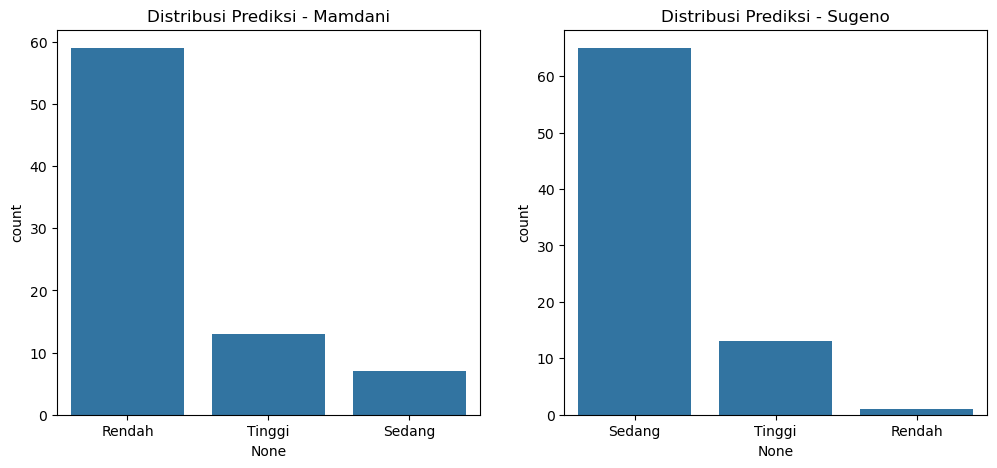

In [42]:
# Visualisasi distribusi prediksi
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_pred_mamdani)
plt.title('Distribusi Prediksi - Mamdani')

plt.subplot(1, 2, 2)
sns.countplot(x=y_pred_sugeno)
plt.title('Distribusi Prediksi - Sugeno')

plt.show()